In [305]:
from __future__ import unicode_literals
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 1

In [308]:
train = pd.read_csv('ItemInfo_trainfull.csv', encoding='utf-8')

/home/juan/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


MemoryError: 

In [307]:
train[0:3]

,itemID,categoryID_x,title_x,description_x,images_array_x,attrsJSON_x,price_x,locationID_x,metroID_x,lat_x,lon_x,itemID_2,isDuplicate,generationMethod,categoryID_y,title_y,description_y,images_array_y,attrsJSON_y,price_y,locationID_y,metroID_y,lat_y,lon_y,parentCategoryID_x,parentCategoryID_y,regionID_x,regionID_y,lendiff_imagearray,priceDifference,latlonDifference,fuzz_ratio,lev_dist,jaro_dist,jarow_dist,description_x_clean,description_y_clean,intersect_BOW,sym_diff_BOW,clusters,desc_sim,City_x,Neighborhood_x,State_x,Street_x,geocodeQuality_x,postalCode_x
0,1,81,Продам Камаз 6520,Продам Камаз 6520 20 тонн,"1064094, 5252822, 6645873, 6960145, 9230265","{""Вид техники"":""Грузовики""}",300000.0,648140,NaN,64.686946,30.815924,4112648,1,1,81,Продам Камаз 6520,Продам Камаз 6520 20 тонн,"1227519, 1374615, 7072137, 8671835","{""Вид техники"":""Грузовики""}",300000.0,648140,NaN,64.686946,30.815924,1,1,648070,648070,1.0,0.0,0.0,1.0,0,1.000000,1.000000,"[продам, камаз, 6520, 20, тонн]","[продам, камаз, 6520, 20, тонн]","[6520, камаз, продам, тонн, 20]",[],0,1.000000,NaN,NaN,Northwestern Federal District,NaN,STATE,NaN
1,3,14,Yamaha r6,Весь в тюнинге.,"11919573, 14412228, 3204180, 6646877","{""Вид техники"":""Мотоциклы"", ""Вид мотоцикла"":""Спортивные""}",300000.0,639040,NaN,55.678037,37.256548,1991275,1,1,14,Yamaha R6,Весь в тюнинге. Возможен торг,"11068709, 13325040, 13783238, 206652, 9458537","{""Вид техники"":""Мотоциклы"", ""Вид мотоцикла"":""Спортивные""}",330000.0,639040,NaN,55.678037,37.256548,1,1,637680,637680,1.0,30000.0,0.0,1.0,1,0.925926,0.955556,[тюнинге],"[тюнинге, возможен, торг]",[тюнинге],"[возможен, торг]",0,0.698324,Odintsovo,NaN,Moscow Oblast,Marshala Jhukova Street,STREET,143000
2,4,84,iPhone 3gs 8gb,"Телефон в хорошем состоянии, трещин и сколов нет, за все время менялся только аккумулятор(поэтому заряд держит хорошо), остальное все родное, в целом работает отлично! В комплекте кабель. Обмен не интересен. Лежит без дела, только продажа.","14384831, 6102021","{""Вид телефона"":""iPhone""}",3500.0,640650,NaN,56.239398,43.460458,1223296,0,1,84,iPhone 3gs 32gb,"В отличном состоянии, в комплекте зарядник и кабель. Без обмена.",5709245,"{""Вид телефона"":""iPhone""}",3500.0,640650,NaN,56.239398,43.460458,6,6,640310,640310,1.0,0.0,0.0,0.9,2,0.931746,0.959048,"[телефон, хорошем, состоянии, трещин, сколов, менялся, аккумуляторпоэтому, заряд, держит, остальное, родное, целом, работает, отлично, комплекте, кабель, обмен, интересен, лежит, дела, продажа]","[отличном, состоянии, комплекте, зарядник, кабель, обмена]","[состоянии, комплекте, кабель]","[работает, держит, лежит, зарядник, родное, интересен, менялся, хорошем, обмен, целом, аккумуляторпоэтому, телефон, сколов, остальное, обмена, отлично, заряд, отличном, дела, продажа, трещин]",0,0.902371,Dzerzhinsk,NaN,Nizhny Novgorod Oblast,1 улица Кирова,POINT,606024


In [133]:
# Null values are numerical, impute with zero
train = train.fillna(value=0,axis=1)

In [134]:
nonnum_columns = [key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object']]

In [48]:
# Memory Error
# ohe = OneHotEncoder()

In [135]:
le = LabelEncoder()

In [136]:
for feature in nonnum_columns:
    print(feature)
    print(type(feature))
    print(train[feature])
    train[feature] = le.fit_transform(train[feature])

In [64]:
train.head()

,itemID,categoryID_x,title_x,description_x,images_array_x,attrsJSON_x,price_x,locationID_x,metroID_x,lat_x,lon_x,itemID_2,isDuplicate,generationMethod,categoryID_y,title_y,description_y,images_array_y,attrsJSON_y,price_y,locationID_y,metroID_y,lat_y,lon_y,parentCategoryID_x,parentCategoryID_y,regionID_x,regionID_y,lendiff_imagearray,priceDifference,latlonDifference,fuzz_ratio,lev_dist,jaro_dist,jarow_dist,description_x_clean,description_y_clean,intersect_BOW,sym_diff_BOW,clusters,desc_sim,City_x,Neighborhood_x,State_x,Street_x,geocodeQuality_x,postalCode_x
0,0,24,48721,45495,9383,1709,3555,1038,12144,3865,208,92005,1,0,24,76470,74376,45646,2161,5001,1101,12002,4787,285,0,0,49,49,1,0,0,97,0,41458,43671,50229,80978,27445,30685,0,133434,0,0,52,0,5,0
1,1,3,12191,12749,24192,1719,3555,677,59418,2232,596,43965,1,0,3,18096,21276,24423,2171,5065,719,59212,2794,790,0,0,33,33,1,3455,0,97,1,40534,42689,74736,118171,92899,46493,0,11566,519,0,45,1529,6,298
2,2,27,12428,67276,43819,1691,1089,762,59417,2835,1961,26226,0,0,27,18438,18208,105216,2143,1414,803,59211,3557,2559,4,4,36,36,1,0,0,87,2,40694,42851,73250,63348,87235,100258,0,63356,168,0,49,29,4,1572
3,3,27,12118,37653,0,1699,1962,1646,59416,2436,778,22480,1,0,27,87395,61464,115098,2151,2670,1737,59210,3500,2969,4,4,79,79,618,0,7495,97,9,32820,28429,39702,64229,25534,30685,0,133434,751,0,44,770,4,133
4,4,21,35546,27270,39365,1805,333,131,59415,2436,778,47846,1,0,21,25520,15498,1362,2257,458,145,59209,3058,1026,5,5,8,8,0,100,0,0,13,693,693,27576,16003,35671,71250,0,116113,751,0,44,770,4,133


In [ ]:
learning_rate': 0.05,
 u'max_depth': 6,
 u'min_child_weight': 4,
 u'n_estimators': 1000

In [226]:
model = xgb.XGBClassifier(learning_rate=0.05, max_depth=6, min_child_weight=4, n_estimators=1000)

In [227]:
y = train['isDuplicate']
x = train.drop('isDuplicate', axis=1)

In [228]:
seed = 1
test_size = 0.77
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = seed)

In [229]:
x_train.shape

(34500, 46)

In [219]:
y_train.shape

(34500,)

In [230]:
gbm = model.fit(x_train,y_train)

In [289]:
pred = gbm.predict(x_test)

In [291]:
pred_1 = [round(value) for value in pred]

In [292]:
accuracy_1 = accuracy_score(y_test, pred_1)

In [293]:
print('XGBoost Accuracy: {}'.format(accuracy_1 * 100.0))

XGBoost Accuracy: 82.6597402597


In [223]:
from sklearn.metrics import roc_auc_score, roc_curve

In [231]:
roc_auc_score(y_test, gbm.predict(x_test))

0.82142092083349783

In [232]:
import matplotlib.pyplot as plt
%matplotlib inline

In [233]:
fpr, tpr, _ = roc_curve(y_test, gbm.predict(x_test))

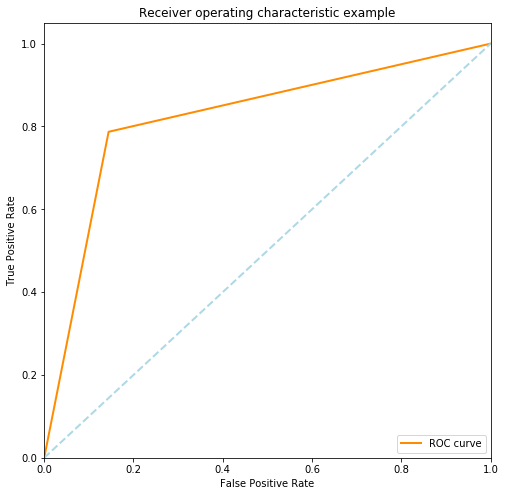

In [234]:
plt.figure(figsize=(8, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [255]:
print(gbm.feature_importances_)

[ 0.04412456  0.03011163  0.03965922  0.03284371  0.04618096  0.03440071
  0.03075793  0.01210341  0.0092832   0.01844888  0.01856639  0.03598708
  0.01204465  0.          0.03824912  0.03301997  0.03202115  0.03128672
  0.03078731  0.00787309  0.00881316  0.01780258  0.01759695  0.0123678   0.
  0.0023208   0.0020564   0.00884254  0.03187427  0.0109577   0.0173913
  0.01941833  0.02943596  0.01028202  0.03854289  0.03058167  0.04847239
  0.04353702  0.          0.03149236  0.02364865  0.          0.01051704
  0.02547004  0.00155699  0.01927144]


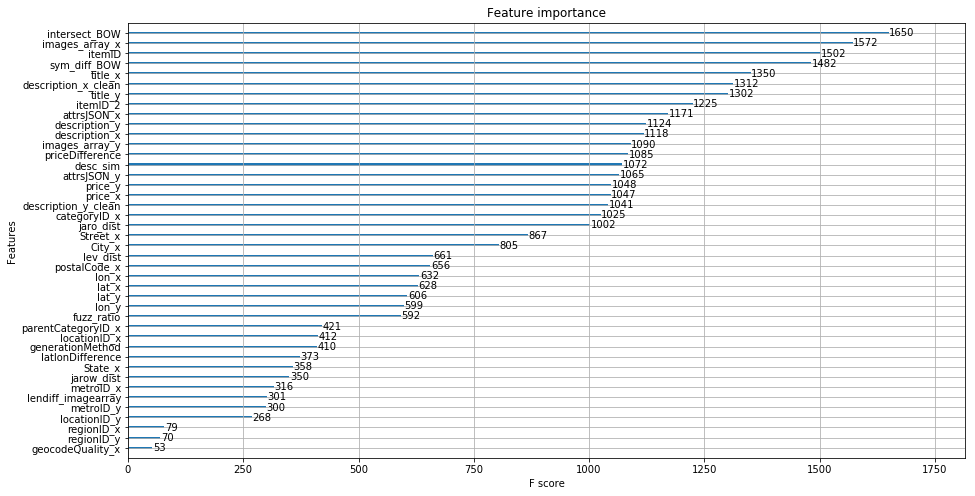

In [256]:
ax = xgb.plot_importance(gbm)
fig = ax.figure
fig.set_size_inches(15,8)

### Use Feature Importance for feature selction

In [257]:
import numpy as np
from sklearn.feature_selection import SelectFromModel

In [258]:
thresholds = np.sort(gbm.feature_importances_)

In [259]:
len(thresholds)

46

In [294]:
lst =[]
for i, thresh in enumerate(thresholds):
#     print('Threshold:{}, {}'.format(thresh, i))
    # gbm is prefitted in the above 
    selection = SelectFromModel(gbm, threshold=thresh, prefit=True)
    # Output should be a matrix to input into model, no need to call fit
#     print(x_train.shape)
    select_x_train = selection.transform(x_train)
    
    # Train model
    selection_model = xgb.XGBClassifier(learning_rate=0.05, max_depth=6, min_child_weight=4, n_estimators=1000)
    selection_model.fit(select_x_train, y_train)
    
    # Evaluate model
    select_x_test = selection.transform(x_test)
    y_pred = selection_model.predict(select_x_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test,predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_x_train.shape[1], accuracy*100.0))

    
    lst.append(accuracy_score(y_test,predictions))    

Thresh=0.000, n=46, Accuracy: 82.66%
Thresh=0.000, n=46, Accuracy: 82.66%
Thresh=0.000, n=46, Accuracy: 82.66%
Thresh=0.000, n=46, Accuracy: 82.66%
Thresh=0.002, n=42, Accuracy: 82.66%
Thresh=0.002, n=41, Accuracy: 82.70%
Thresh=0.002, n=40, Accuracy: 82.66%
Thresh=0.008, n=39, Accuracy: 82.66%
Thresh=0.009, n=38, Accuracy: 82.67%
Thresh=0.009, n=37, Accuracy: 82.58%
Thresh=0.009, n=36, Accuracy: 82.45%
Thresh=0.010, n=35, Accuracy: 82.58%
Thresh=0.011, n=34, Accuracy: 82.54%
Thresh=0.011, n=33, Accuracy: 82.57%
Thresh=0.012, n=32, Accuracy: 82.43%
Thresh=0.012, n=31, Accuracy: 80.06%
Thresh=0.012, n=30, Accuracy: 80.01%
Thresh=0.017, n=29, Accuracy: 79.96%
Thresh=0.018, n=28, Accuracy: 79.10%
Thresh=0.018, n=27, Accuracy: 79.06%
Thresh=0.018, n=26, Accuracy: 79.06%
Thresh=0.019, n=25, Accuracy: 79.09%
Thresh=0.019, n=24, Accuracy: 79.01%
Thresh=0.019, n=23, Accuracy: 78.81%
Thresh=0.024, n=22, Accuracy: 78.61%
Thresh=0.025, n=21, Accuracy: 78.50%
Thresh=0.029, n=20, Accuracy: 78.16%
T

In [295]:
lst = np.array(lst) 
feature = np.array(range(0,47))

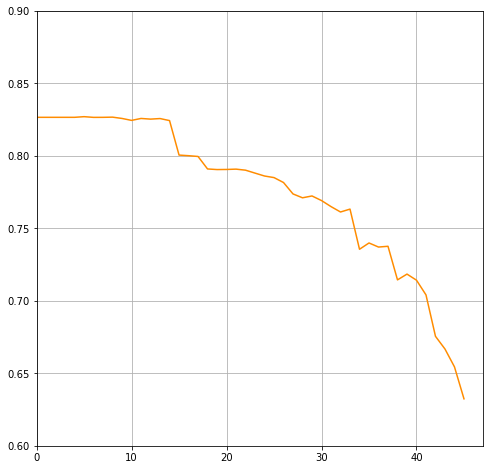

In [298]:
plt.figure(figsize=(8, 8))
plt.plot(lst, color='darkorange', label='Accuracy curve')
plt.xlim([0, 47])
plt.ylim([0.6, 0.90])
plt.grid(True)
plt.show()

After dropping  more than 15 features, accuracy score starts to drop at a more significant rate.

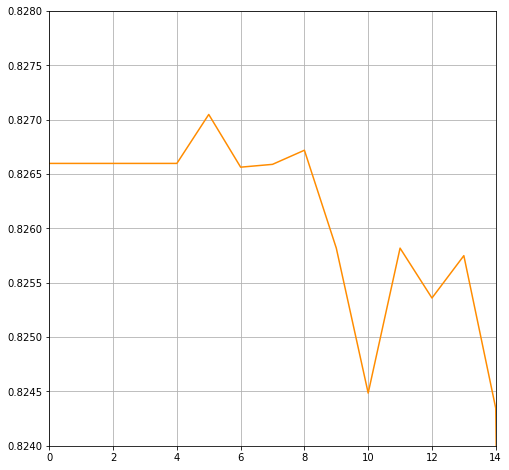

In [304]:
# Zoomed in view
plt.figure(figsize=(8, 8))
plt.plot(lst, color='darkorange', label='Accuracy curve')
plt.xlim([0, 14])
plt.ylim([0.824, 0.828])
plt.grid(True)
plt.show()

Optimal number of features to drop: 5 

### GridSearchCV

In [68]:
from sklearn.grid_search import GridSearchCV

/home/juan/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [66]:
params = {'learning_rate': [0, 0.01, 0.05, 0.5]
         ,'max_depth': [0, 2, 4, 6]
         ,'min_child_weight':[4, 7, 11]
         ,'n_estimators': [50, 100, 1000, 3000]}

In [122]:
xgboost_gridsearch = GridSearchCV(gbm, params, n_jobs=5, scoring='roc_auc')

In [213]:
xgboost_gridsearch.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=5,
       param_grid={u'n_estimators': [50, 100, 1000, 3000], u'learning_rate': [0, 0.01, 0.05, 0.5], u'max_depth': [0, 2, 4, 6], u'min_child_weight': [4, 7, 11]},
       pre_dispatch='2*n_jobs', refit=True, scoring=u'roc_auc', verbose=0)

In [214]:
xgboost_gridsearch.best_score_

0.9028567816429716

In [225]:
xgboost_gridsearch.best_params_

{u'learning_rate': 0.05,
 u'max_depth': 6,
 u'min_child_weight': 4,
 u'n_estimators': 1000}

{u'learning_rate': 0.05,
 u'max_depth': 6,
 u'min_child_weight': 4,
 u'n_estimators': 1000}